# Sentiment Analysis with BERT

## Preparing TensorFlow API

In [37]:
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Import the Bert text model.

In [2]:
preprocessor = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [3]:
preprocessor_model = hub.KerasLayer(preprocessor)
encoder_model = hub.KerasLayer(encoder)

Read the data file.

In [4]:
with open("frame_v5.csv", 'r') as input_file:
    data = pd.read_csv(input_file)
data

,ï»¿Stories,Higher-level,Definition Higher-level,Main,Sub,Definition Main,Prompt,Comments
0,The sales office was bustling with activity as...,Conservation,NaN,Conformity-Interpersonal,NaN,NaN,avoid upsetting others,NaN
1,"It was a typical day in the sales office, and ...",Conservation,NaN,Conformity-Interpersonal,NaN,NaN,never annoy anyone,NaN
2,The sales office was abuzz with energy as the ...,Conservation,NaN,Conformity-Interpersonal,NaN,NaN,make other people angry,NaN
3,The beige walls of the sales office were a rem...,Conservation,NaN,Conformity-Rules,NaN,NaN,hold a deep conviction never to violate rules ...,NaN
4,Linda had always been a rule follower. As a sa...,Conservation,NaN,Conformity-Rules,NaN,NaN,follow rules even when no one is watching,NaN
5,Jenna was a salesperson with a strong belief i...,Conservation,NaN,Conformity-Rules,NaN,NaN,obey all the laws,NaN
6,The sun shone brightly through the large windo...,Conservation,NaN,Humility (Conservation),NaN,NaN,protect the weak and vulnerable in society,This is in Schwartz
7,It was a typical day in the sales office. The ...,Conservation,NaN,Humility (Conservation),NaN,NaN,value humility dear to their heart,NaN
8,The sales office was bustling with activity as...,Conservation,NaN,Humility (Conservation),NaN,NaN,be satisfied with what they have and not ask f...,NaN
9,The sun was just beginning to peek over the ho...,Conservation,NaN,Security Personal,NaN,NaN,prioritize the value of avoiding disease and p...,NaN


## Label Representation

Extract higher-level values.

In [5]:
values = data.get("Higher-level")

Value-int mapping.

In [6]:
value_vector_map = {
    "nan": -1,
    "Self-Transcendence": 0,
    "Self-Enhancement": 1,
    "Openness to change": 2,
    "Conservation": 3
}

Map values to unique integers.

In [7]:
labels = [value_vector_map[str(vector_value)] for vector_value in values if str(vector_value) in value_vector_map]
print(labels)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3]


In [8]:
label_embedding = []
for label in labels:
    embedding = np.zeros(4, dtype=int)
    embedding[label] = 1
    label_embedding.append(list(embedding))
print(label_embedding)

[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1]]


## Data Split

Extract stories.

In [9]:
stories = data.get("ï»¿Stories")

Create train-test data splits.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(stories, label_embedding, test_size=0.2, random_state=42)

In [12]:
y_train = my_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = my_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [13]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

43    It was a typical day in the sales office. Ever...
26    Alice had been working in the sales office for...
8     The sales office was bustling with activity as...
17    Miguel had been working in the sales office fo...
6     The sun shone brightly through the large windo...
4     Linda had always been a rule follower. As a sa...
40    The sun shone brightly through the windows of ...
19    It was just another day in the sales office fo...
36    The office was buzzing with energy. Salespeopl...
48    The office was abuzz with activity. Salespeopl...
37    The office was alive with energy as the salesp...
53    The sales office was bustling with activity as...
15    Theodore looked around the sales office and si...
9     The sun was just beginning to peek over the ho...
16    The sun shone brightly through the windows of ...
24    Mandy was a salesperson at a well-known compan...
33    John had been working in the sales office for ...
54    The sales office was bustling with activit

## Testing Embeddings

Testing the embeddings, created by Bert.

In [14]:
testing_preprocessor = preprocessor_model(stories)
testing_encoder = encoder_model(testing_preprocessor)

57 stories overall, each encoded as a vector of size 768.

In [15]:
testing_encoder["pooled_output"]

<tf.Tensor: shape=(57, 768), dtype=float32, numpy=
array([[-0.6829978 , -0.6027371 , -0.9899882 , ..., -0.97012275,
        -0.66694003,  0.6817621 ],
       [-0.59805363, -0.44194093, -0.83566415, ..., -0.6621782 ,
        -0.5448072 ,  0.7358482 ],
       [-0.58717364, -0.46300095, -0.9312209 , ..., -0.78218824,
        -0.617378  ,  0.5987622 ],
       ...,
       [-0.44593978, -0.48500544, -0.96666056, ..., -0.93473494,
        -0.553781  ,  0.47519213],
       [-0.5483283 , -0.43230426, -0.9836661 , ..., -0.9485141 ,
        -0.5910426 ,  0.6302644 ],
       [-0.68378127, -0.6005705 , -0.98013794, ..., -0.95272   ,
        -0.6463854 ,  0.52575856]], dtype=float32)>

## Neural Network

In [32]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

Initialize the ML model.

In [33]:
input_text = Input(shape=(), dtype=tf.string)
preprocessed_text = preprocessor_model(input_text)
text_encoding = encoder_model(preprocessed_text)

output = tf.keras.layers.Dense(128, activation="sigmoid")(text_encoding['pooled_output'])
output = tf.keras.layers.Dropout(0.2)(output)
output = tf.keras.layers.Dense(4, activation="sigmoid")(output)

model = Model(inputs=input_text, outputs=output)

Adam is a generally good optimization algorithm. \
Categorical Cross Entropy is used as we are dealing with multi-labelled data.

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

### Model Training

In [36]:
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
2/2 [==============================] - 6s 2s/step - loss: 1.3040 - accuracy: 0.2444
Epoch 2/15
2/2 [==============================] - 8s 3s/step - loss: 1.4124 - accuracy: 0.3333
Epoch 3/15
2/2 [==============================] - 9s 3s/step - loss: 1.2316 - accuracy: 0.4444
Epoch 4/15
2/2 [==============================] - 9s 3s/step - loss: 1.2878 - accuracy: 0.3556
Epoch 5/15
2/2 [==============================] - 9s 3s/step - loss: 1.2020 - accuracy: 0.4444
Epoch 6/15
2/2 [==============================] - 8s 2s/step - loss: 1.2486 - accuracy: 0.4222
Epoch 7/15
2/2 [==============================] - 8s 2s/step - loss: 1.2208 - accuracy: 0.4667
Epoch 8/15
2/2 [==============================] - 8s 3s/step - loss: 1.2580 - accuracy: 0.3778
Epoch 9/15
2/2 [==============================] - 9s 3s/step - loss: 1.2227 - accuracy: 0.3778
Epoch 10/15
2/2 [==============================] - 9s 2s/step - loss: 1.1742 - accuracy: 0.3333
Epoch 11/15
2/2 [==============================] 

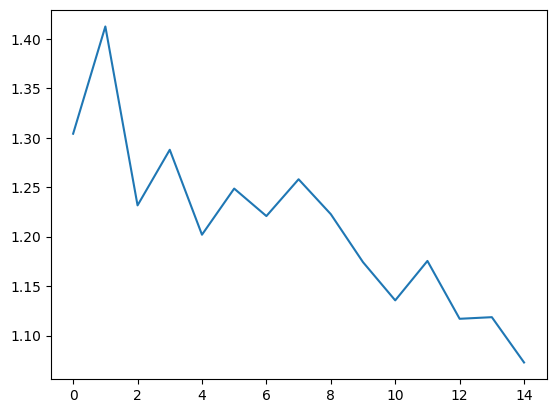

In [39]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.show()